In [13]:
import numpy as np
import matplotlib.pyplot as plt
import kwant
import scipy.linalg as la
from scipy.constants import physical_constants

In [14]:
h_bar = physical_constants['Planck constant over 2 pi'][0]
h_bar_eV = physical_constants['Planck constant over 2 pi in eV s'][0]
m_el = physical_constants['electron mass'][0]
eV = physical_constants['electron volt'][0]

In [15]:
a = 1.0e-9
a_nm  = a*10**9
N = 100

t = (h_bar ** 2)/(2 * m_el * a * a)/eV
print(t)

0.03809981988649954


In [16]:
sys = kwant.Builder()
lat = kwant.lattice.chain(a_nm)

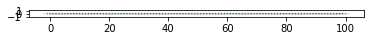

In [17]:
def onsite(site, xb1, xb2, Ub, Lb):
    (x,) = site.pos
    if((xb1 - Lb/2) < x < (xb1 + Lb/2) or (xb2 - Lb/2) < x < (xb2 + Lb/2)):
        return 2*t + Ub
    else:
        return 2*t

for i in range(N):
    sys[lat(i)] = onsite
    
sys[lat.neighbors()] = -t

leadl = kwant.Builder(kwant.TranslationalSymmetry((-a_nm,)))
leadl[lat(0)] = 2*t
leadl[lat.neighbors()] = -t

leadr = kwant.Builder(kwant.TranslationalSymmetry((a_nm,)))
leadr[lat(0)] = 2*t
leadr[lat.neighbors()] = -t

sys.attach_lead(leadl)
sys.attach_lead(leadr)

kwant.plot(sys);

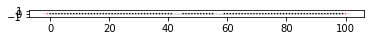

In [18]:
xb1 = 43
xb2 = 57
Lb = 4
Ub = 0.5*t
sysf = sys.finalized()
kwant.plot(sysf, site_color = lambda site: sysf.hamiltonian(site, site, params = dict(xb1 = xb1, xb2 = xb2, Ub=Ub, Lb=Lb)), colorbar = False);

In [19]:
def calc_transmission(syst, ene, xb1, xb2, Ub, Lb):
    smatrix = kwant.smatrix(syst, ene, params = dict(xb1=xb1, xb2=xb2, Lb=Lb, Ub=Ub))
    return smatrix.transmission(1,0)

In [20]:
Emin = 0.0001
Emax = 2*Ub
NE = 600

Etab = np.linspace(Emin, Emax, NE)
Ttab = np.zeros(NE)
for i in range(NE):
    Ttab[i] = calc_transmission(sysf, Etab[i], xb1, xb2, Ub, Lb)

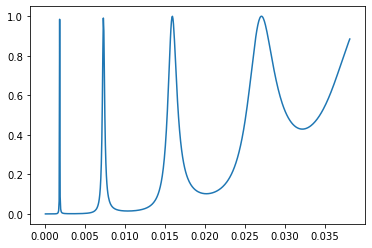

In [21]:
plt.plot(Etab, Ttab);

In [22]:
from ipywidgets import interact

In [23]:
def plot_wf(i=0):
    ene = Emin + i*(Emax-Emin)/NE
    print("E = ", ene)
    wf = kwant.solvers.default.wave_function(sysf, ene, params = dict(xb1 = xb1, xb2 = xb2, Lb = Lb, Ub = Ub))
    plt.plot(np.abs(wf(0)[0])**2)
    plt.grid()

In [24]:
interact(plot_wf, i = (0, NE))

interactive(children=(IntSlider(value=0, description='i', max=600), Output()), _dom_classes=('widget-interact'…

<function __main__.plot_wf(i=0)>